# Data: Wet Spell Lengths by Month

Make violin plot comparison plots of the wet spell lengths by month

## Imports and Parameters

In [1]:
%matplotlib inline

In [2]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import pickle
import seaborn as sns
from copy import deepcopy

In [3]:
IN_DIR = r'C:\Users\nmartin\Documents\CC_IRD\Data\Processed'
PRISM_IN = "WetDays_1981-2010.pickle"
LOCA_DP_IN = { 1 : "Jan_WetCnt_CMIP5_1981-2010.pickle",
               2 : "Feb_WetCnt_CMIP5_1981-2010.pickle",
               3 : "Mar_WetCnt_CMIP5_1981-2010.pickle",
               4 : "Apr_WetCnt_CMIP5_1981-2010.pickle",
               5 : "May_WetCnt_CMIP5_1981-2010.pickle",
               6 : "Jun_WetCnt_CMIP5_1981-2010.pickle",
               7 : "Jul_WetCnt_CMIP5_1981-2010.pickle",
               8 : "Aug_WetCnt_CMIP5_1981-2010.pickle",
               9 : "Sep_WetCnt_CMIP5_1981-2010.pickle",
              10 : "Oct_WetCnt_CMIP5_1981-2010.pickle",
              11 : "Nov_WetCnt_CMIP5_1981-2010.pickle",
              12 : "Dec_WetCnt_CMIP5_1981-2010.pickle",    
}
LOCA_P1_IN = { 1 : "Jan_WetCnt_CMIP5_LOCA_2011-2040.pickle",
               2 : "Feb_WetCnt_CMIP5_LOCA_2011-2040.pickle",
               3 : "Mar_WetCnt_CMIP5_LOCA_2011-2040.pickle",
               4 : "Apr_WetCnt_CMIP5_LOCA_2011-2040.pickle",
               5 : "May_WetCnt_CMIP5_LOCA_2011-2040.pickle",
               6 : "Jun_WetCnt_CMIP5_LOCA_2011-2040.pickle",
               7 : "Jul_WetCnt_CMIP5_LOCA_2011-2040.pickle",
               8 : "Aug_WetCnt_CMIP5_LOCA_2011-2040.pickle",
               9 : "Sep_WetCnt_CMIP5_LOCA_2011-2040.pickle",
              10 : "Oct_WetCnt_CMIP5_LOCA_2011-2040.pickle",
              11 : "Nov_WetCnt_CMIP5_LOCA_2011-2040.pickle",
              12 : "Dec_WetCnt_CMIP5_LOCA_2011-2040.pickle",    
}
LOCA_P2_IN = { 1 : "Jan_WetCnt_CMIP5_LOCA_2041-2070.pickle",
               2 : "Feb_WetCnt_CMIP5_LOCA_2041-2070.pickle",
               3 : "Mar_WetCnt_CMIP5_LOCA_2041-2070.pickle",
               4 : "Apr_WetCnt_CMIP5_LOCA_2041-2070.pickle",
               5 : "May_WetCnt_CMIP5_LOCA_2041-2070.pickle",
               6 : "Jun_WetCnt_CMIP5_LOCA_2041-2070.pickle",
               7 : "Jul_WetCnt_CMIP5_LOCA_2041-2070.pickle",
               8 : "Aug_WetCnt_CMIP5_LOCA_2041-2070.pickle",
               9 : "Sep_WetCnt_CMIP5_LOCA_2041-2070.pickle",
              10 : "Oct_WetCnt_CMIP5_LOCA_2041-2070.pickle",
              11 : "Nov_WetCnt_CMIP5_LOCA_2041-2070.pickle",
              12 : "Dec_WetCnt_CMIP5_LOCA_2041-2070.pickle",    
}
LOCA_P3_IN = { 1 : "Jan_WetCnt_CMIP5_LOCA_2071-2100.pickle",
               2 : "Feb_WetCnt_CMIP5_LOCA_2071-2100.pickle",
               3 : "Mar_WetCnt_CMIP5_LOCA_2071-2100.pickle",
               4 : "Apr_WetCnt_CMIP5_LOCA_2071-2100.pickle",
               5 : "May_WetCnt_CMIP5_LOCA_2071-2100.pickle",
               6 : "Jun_WetCnt_CMIP5_LOCA_2071-2100.pickle",
               7 : "Jul_WetCnt_CMIP5_LOCA_2071-2100.pickle",
               8 : "Aug_WetCnt_CMIP5_LOCA_2071-2100.pickle",
               9 : "Sep_WetCnt_CMIP5_LOCA_2071-2100.pickle",
              10 : "Oct_WetCnt_CMIP5_LOCA_2071-2100.pickle",
              11 : "Nov_WetCnt_CMIP5_LOCA_2071-2100.pickle",
              12 : "Dec_WetCnt_CMIP5_LOCA_2071-2100.pickle",    
}
NUM_MODEL = 64

In [4]:
OUT_DIR = r'C:\Users\nmartin\Documents\CC_IRD\Events'

In [5]:
ExGridID = lambda MID: int( MID.split("_")[1] )

In [6]:
PRISM_GRID = {  665148 : 0.00176052422816,
                666551 : 0.00003619777770,
                666552 : 0.00447893807178,
                666553 : 0.02233714669049,
                667952 : 0.00000017337539,
                667953 : 0.00759409538941,
                667954 : 0.00944984698009,
                667955 : 0.02000399281203,
                667956 : 0.02887520321616,
                667957 : 0.03994590652912,
                667958 : 0.01503588013165,
                669356 : 0.00040530215007,
                669357 : 0.01642009505413,
                669358 : 0.04025673468223,
                669359 : 0.04025524462676,
                669360 : 0.04025378667464,
                669361 : 0.04025236082198,
                669362 : 0.03036726578528,
                669363 : 0.00019977241236,
                670761 : 0.01225891679128,
                670762 : 0.04027489656596,
                670763 : 0.04027337248402,
                670764 : 0.04027188055013,
                670765 : 0.04027042075996,
                670766 : 0.03695970510496,
                670767 : 0.00962956858856,
                672166 : 0.01457105102829,
                672167 : 0.04029151499066,
                672168 : 0.04028998899039,
                672169 : 0.04028849517830,
                672170 : 0.03708655350147,
                672171 : 0.01247135550851,
                673571 : 0.01120101439253,
                673572 : 0.04030811211126,
                673573 : 0.04030658419330,
                673574 : 0.03927785081953,
                673575 : 0.00709453472727,
                674976 : 0.00036798560164,
                674977 : 0.02811487768940,
                674978 : 0.04032315808561,
                674979 : 0.01933268375330,
                676382 : 0.00280777495815,
                676383 : 0.00689566874867,
                676384 : 0.00110356746745,
}
PRISM_GRID_IDs = sorted( PRISM_GRID.keys() )
sum( PRISM_GRID.values() )

1.00000000000003

In [7]:
LOCA_GRID = {   62 : 0.00975665681587,
                63 : 0.06984963803800,
                64 : 0.02082930230072,
                76 : 0.04809232194328,
                77 : 0.08996761256735,
                78 : 0.07587308637403,
                79 : 0.00856966746339,
                90 : 0.05037034481002,
                91 : 0.09141978145391,
                92 : 0.09133421001522,
                93 : 0.07894275139521,
                94 : 0.00987122962317,
                104 : 0.00563905995157,
                105 : 0.05800708699594,
                106 : 0.07837366767499,
                107 : 0.08920227204998,
                108 : 0.05516277301390,
                120 : 0.00103060109449,
                121 : 0.00904520193285,
                122 : 0.04853306134652,
                123 : 0.00852111547488,
                137 : 0.00160855766471,
}
LOCA_GRID_IDs = sorted( LOCA_GRID.keys() )
sum( LOCA_GRID.values() )

1.0

## Load PRISM

In [8]:
InFiler = os.path.normpath( os.path.join( IN_DIR, "PRISM", PRISM_IN ) )
PrismDF = pd.read_pickle( InFiler )

In [9]:
display( HTML( PrismDF.head().to_html() ) )

,Grid_Id,Year,Month,Day,Wet_Count,Total_Depth,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8,Day_9,Day_10,Day_11,Day_12,Day_13,Day_14,Day_15,Day_16,Day_17,Day_18,Day_19
0,662328,1981,1,6,1,1.31,1.31,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,662328,1981,1,9,1,7.96,7.96,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,662328,1981,1,11,1,0.32,0.32,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,662328,1981,1,14,1,0.70,0.70,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,662328,1981,1,17,3,12.92,1.08,5.27,6.57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
len( PrismDF )

226190

In [11]:
WSPrismDF = PrismDF[PrismDF["Grid_Id"].isin( PRISM_GRID_IDs )].copy()
len( WSPrismDF )

47329

In [12]:
display( HTML( WSPrismDF.describe().to_html() ) )

,Grid_Id,Year,Month,Day,Wet_Count,Total_Depth,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8,Day_9,Day_10,Day_11,Day_12,Day_13,Day_14,Day_15,Day_16,Day_17,Day_18,Day_19
count,47329.000000,47329.000000,47329.00000,47329.000000,47329.000000,47329.000000,47329.000000,47329.000000,47329.000000,47329.000000,47329.000000,47329.000000,47329.000000,47329.000000,47329.000000,47329.000000,47329.000000,47329.000000,47329.000000,47329.000000,47329.000000,47329.000000,47329.000000,47329.000000,47329.000000
mean,670857.050772,1995.398360,6.27873,15.807074,1.966405,14.752258,5.966657,4.769479,1.867925,0.897483,0.475864,0.248608,0.161971,0.098425,0.033350,0.011313,0.041466,0.095181,0.026695,0.012728,0.006461,0.013111,0.006078,0.019366,0.000097
std,2910.705916,8.754043,3.25788,8.909511,1.408094,22.262867,8.870597,9.833955,5.699056,4.674314,3.580288,2.780688,2.256475,1.554868,0.764202,0.295985,1.394576,2.577572,0.722126,0.308708,0.241156,0.486133,0.232613,0.721044,0.005719
min,665148.000000,1981.000000,1.00000,1.000000,1.000000,0.200000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,667958.000000,1987.000000,4.00000,8.000000,1.000000,1.760000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,670763.000000,1995.000000,6.00000,15.000000,2.000000,6.540000,2.630000,0.460000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,673571.000000,2003.000000,9.00000,24.000000,2.000000,18.090000,7.230000,5.210000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,676384.000000,2010.000000,12.00000,31.000000,19.000000,318.780005,130.320007,200.690002,80.129997,102.910004,117.230003,76.699997,120.930000,71.309998,53.560001,28.850000,164.240005,140.009995,41.040001,21.820000,12.270000,23.129999,13.830000,34.720001,0.420000


Extract the arrays of spell lengths by months to a dictionary

In [13]:
PrismMonDict = dict()

In [14]:
for iI in range(1, 13, 1):
    cMonDF = WSPrismDF[WSPrismDF["Month"] == iI].copy()
    cPrAr = cMonDF["Wet_Count"].to_numpy()
    print("Month %d: %d wet spells, max %g" % ( iI, cPrAr.shape[0], cPrAr.max() ) )
    PrismMonDict[iI] = cPrAr
# end for

Month 1: 3699 dry spells, max 9
Month 2: 3598 dry spells, max 6
Month 3: 4339 dry spells, max 6
Month 4: 3915 dry spells, max 6
Month 5: 5191 dry spells, max 8
Month 6: 4814 dry spells, max 14
Month 7: 3624 dry spells, max 9
Month 8: 4136 dry spells, max 15
Month 9: 4283 dry spells, max 8
Month 10: 4077 dry spells, max 19
Month 11: 2854 dry spells, max 8
Month 12: 2799 dry spells, max 8


In [15]:
del PrismDF
del WSPrismDF

Output to a pickle in case that need to use these later

In [16]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "PRISM_DP_WetSpell_by_Month.pickle" ) )
with open( OutFiler, 'wb' ) as OP:
    pickle.dump( PrismMonDict, OP, protocol=pickle.HIGHEST_PROTOCOL )
# end with

# Load LOCA

There is a separate file for each analysis period and will have to handle these individually

### Data Period

In [17]:
cMon = 1
InFiler = os.path.normpath( os.path.join( IN_DIR, "LOCA", LOCA_DP_IN[cMon] ) )
LOCA_DP_DF = pd.read_pickle( InFiler )

In [18]:
#LOCA_DP_DF["Grid_Id"] = LOCA_DP_DF.apply( lambda row: ExGridID(row["MGrid_Id"]), axis=1 )

In [19]:
display( HTML( LOCA_DP_DF.head().to_html() ) )

,MGrid_Id,Year,Month,Day,Wet_Count,Total_Depth,Grid_Id,Model_Id
0,M100_169,1981,1,2,2,11.387080,169,100
1,M100_169,1981,1,7,6,15.535727,169,100
2,M100_169,1981,1,14,4,6.075534,169,100
3,M100_169,1981,1,24,2,3.113439,169,100
4,M100_169,1981,1,27,1,0.894761,169,100


In [20]:
len( LOCA_DP_DF )

1718160

In [21]:
WSL_DP_DF = LOCA_DP_DF[LOCA_DP_DF["Grid_Id"].isin( LOCA_GRID_IDs )].copy()
len( WSL_DP_DF )

133246

In [22]:
del LOCA_DP_DF

In [23]:
display( HTML( WSL_DP_DF.describe().to_html() ) )

,Year,Month,Day,Wet_Count,Total_Depth,Grid_Id,Model_Id
count,133246.000000,133246.0,133246.000000,133246.000000,133246.000000,133246.000000,133246.000000
mean,1995.270867,1.0,16.472585,1.848693,5.549241,96.000931,32.455023
std,8.699206,0.0,8.972028,1.156222,8.956883,20.813730,18.479746
min,1981.000000,1.0,1.000000,1.000000,0.200019,62.000000,1.000000
25%,1988.000000,1.0,9.000000,1.000000,0.590504,78.000000,17.000000
50%,1995.000000,1.0,17.000000,1.000000,1.901467,93.000000,33.000000
75%,2003.000000,1.0,24.000000,2.000000,6.602073,108.000000,49.000000
max,2010.000000,1.0,31.000000,12.000000,92.907669,137.000000,64.000000


In [24]:
L_DP_MD = dict()

In [25]:
for iI in range(1, 13, 1):
    InFiler = os.path.normpath( os.path.join( IN_DIR, "LOCA", LOCA_DP_IN[iI] ) )
    LOCA_DP_DF = pd.read_pickle( InFiler )
    WSL_DP_DF = LOCA_DP_DF[LOCA_DP_DF["Grid_Id"].isin( LOCA_GRID_IDs )].copy()
    cMonDF = WSL_DP_DF[WSL_DP_DF["Month"] == iI].copy()
    cLocaAr = cMonDF["Wet_Count"].to_numpy()
    print("Month %d: %d wet spells, %g max" % ( iI, cLocaAr.shape[0], cLocaAr.max() ) )
    L_DP_MD[iI] = cLocaAr
# end for

Month 1: 133246 wet spells, 12 max
Month 2: 133666 wet spells, 13 max
Month 3: 146777 wet spells, 19 max
Month 4: 165299 wet spells, 21 max
Month 5: 195317 wet spells, 37 max
Month 6: 162592 wet spells, 29 max
Month 7: 135080 wet spells, 37 max
Month 8: 145206 wet spells, 30 max
Month 9: 158730 wet spells, 22 max
Month 10: 148301 wet spells, 17 max
Month 11: 150757 wet spells, 17 max
Month 12: 143840 wet spells, 12 max


In [26]:
del WSL_DP_DF
del LOCA_DP_DF

Output to a pickle file in case need to use again later

In [27]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "LOCA_DP_WetSpell_by_Month.pickle" ) )
with open( OutFiler, 'wb' ) as OP:
    pickle.dump( L_DP_MD, OP, protocol=pickle.HIGHEST_PROTOCOL )
# end with

### Projection 1

In [28]:
cMon = 1
InFiler = os.path.normpath( os.path.join( IN_DIR, "LOCA", LOCA_P1_IN[cMon] ) )
LOCA_P1_DF = pd.read_pickle( InFiler )

In [29]:
display( HTML( LOCA_P1_DF.head().to_html() ) )

,MGrid_Id,Grid_Id,Mod_Id,Year,Month,Day,Wet_Count,Model_Id
0,M10_1,1,10,2011,1,9,1,10
1,M10_1,1,10,2011,1,15,2,10
38,M10_1,1,10,2012,1,17,1,10
39,M10_1,1,10,2012,1,28,1,10
40,M10_1,1,10,2012,1,31,1,10


In [30]:
len( LOCA_P1_DF )

936856

In [31]:
WSL_P1_DF = LOCA_P1_DF[LOCA_P1_DF["Grid_Id"].isin( LOCA_GRID_IDs )].copy()
len( WSL_P1_DF )

122783

In [32]:
display( HTML( WSL_P1_DF.describe().to_html() ) )

,Grid_Id,Mod_Id,Year,Month,Day,Wet_Count,Model_Id
count,122783.000000,122783.000000,122783.000000,122783.0,122783.000000,122783.000000,122783.000000
mean,96.130116,32.047230,2025.465724,1.0,16.469422,1.790818,32.047230
std,20.819220,18.427605,8.665959,0.0,9.068332,1.110828,18.427605
min,62.000000,1.000000,2011.000000,1.0,1.000000,1.000000,1.000000
25%,78.000000,16.000000,2018.000000,1.0,9.000000,1.000000,16.000000
50%,94.000000,32.000000,2025.000000,1.0,17.000000,1.000000,32.000000
75%,108.000000,48.000000,2033.000000,1.0,24.000000,2.000000,48.000000
max,137.000000,64.000000,2040.000000,1.0,31.000000,12.000000,64.000000


In [33]:
L_P1_MD = dict()

In [34]:
for iI in range(1, 13, 1):
    InFiler = os.path.normpath( os.path.join( IN_DIR, "LOCA", LOCA_P1_IN[iI] ) )
    LOCA_P1_DF = pd.read_pickle( InFiler )
    WSL_P1_DF = LOCA_P1_DF[LOCA_P1_DF["Grid_Id"].isin( LOCA_GRID_IDs )].copy()
    cMonDF = WSL_P1_DF[WSL_P1_DF["Month"] == iI].copy()
    cLocaAr = cMonDF["Wet_Count"].to_numpy()
    print("Month %d: %d wet spells, %g max" % ( iI, cLocaAr.shape[0], cLocaAr.max() ) )
    L_P1_MD[iI] = cLocaAr
# end for

Month 1: 122783 wet spells, 12 max
Month 2: 129402 wet spells, 16 max
Month 3: 143241 wet spells, 14 max
Month 4: 162352 wet spells, 26 max
Month 5: 190395 wet spells, 29 max
Month 6: 156285 wet spells, 30 max
Month 7: 129304 wet spells, 28 max
Month 8: 140196 wet spells, 32 max
Month 9: 155284 wet spells, 37 max
Month 10: 142731 wet spells, 20 max
Month 11: 143413 wet spells, 15 max
Month 12: 134517 wet spells, 14 max


In [35]:
del LOCA_P1_DF
del WSL_P1_DF

Output to a pickle file in case need to use again later

In [36]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "LOCA_P1_WetSpell_by_Month.pickle" ) )
with open( OutFiler, 'wb' ) as OP:
    pickle.dump( L_P1_MD, OP, protocol=pickle.HIGHEST_PROTOCOL )
# end with

### Projection 2

In [37]:
L_P2_MD = dict()

In [38]:
for iI in range(1, 13, 1):
    InFiler = os.path.normpath( os.path.join( IN_DIR, "LOCA", LOCA_P2_IN[iI] ) )
    LOCA_P2_DF = pd.read_pickle( InFiler )
    WSL_P2_DF = LOCA_P2_DF[LOCA_P2_DF["Grid_Id"].isin( LOCA_GRID_IDs )].copy()
    cMonDF = WSL_P2_DF[WSL_P2_DF["Month"] == iI].copy()
    cLocaAr = cMonDF["Wet_Count"].to_numpy()
    print("Month %d: %d wet spells, %g max" % ( iI, cLocaAr.shape[0], cLocaAr.max() ) )
    L_P2_MD[iI] = cLocaAr
# end for

Month 1: 120028 wet spells, 13 max
Month 2: 125374 wet spells, 15 max
Month 3: 136427 wet spells, 16 max
Month 4: 158406 wet spells, 23 max
Month 5: 183886 wet spells, 38 max
Month 6: 152863 wet spells, 36 max
Month 7: 127831 wet spells, 28 max
Month 8: 137081 wet spells, 47 max
Month 9: 153552 wet spells, 31 max
Month 10: 139387 wet spells, 19 max
Month 11: 141682 wet spells, 21 max
Month 12: 131635 wet spells, 16 max


In [39]:
del LOCA_P2_DF
del WSL_P2_DF

Output to a pickle file in case need to use again later

In [40]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "LOCA_P2_WetSpell_by_Month.pickle" ) )
with open( OutFiler, 'wb' ) as OP:
    pickle.dump( L_P2_MD, OP, protocol=pickle.HIGHEST_PROTOCOL )
# end with

### Projection 3

In [41]:
L_P3_MD = dict()

In [42]:
for iI in range(1, 13, 1):
    InFiler = os.path.normpath( os.path.join( IN_DIR, "LOCA", LOCA_P3_IN[iI] ) )
    LOCA_P3_DF = pd.read_pickle( InFiler )
    WSL_P3_DF = LOCA_P3_DF[LOCA_P3_DF["Grid_Id"].isin( LOCA_GRID_IDs )].copy()
    cMonDF = WSL_P3_DF[WSL_P3_DF["Month"] == iI].copy()
    cLocaAr = cMonDF["Wet_Count"].to_numpy()
    print("Month %d: %d wet spells, %g max" % ( iI, cLocaAr.shape[0], cLocaAr.max() ) )
    L_P3_MD[iI] = cLocaAr
# end for

Month 1: 113099 wet spells, 18 max
Month 2: 117365 wet spells, 12 max
Month 3: 130690 wet spells, 15 max
Month 4: 149588 wet spells, 20 max
Month 5: 177136 wet spells, 34 max
Month 6: 144041 wet spells, 27 max
Month 7: 119750 wet spells, 39 max
Month 8: 126522 wet spells, 32 max
Month 9: 145345 wet spells, 27 max
Month 10: 130142 wet spells, 24 max
Month 11: 132772 wet spells, 15 max
Month 12: 123477 wet spells, 12 max


In [43]:
del LOCA_P3_DF
del WSL_P3_DF

Output to a pickle file in case need to use again later

In [44]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "LOCA_P3_WetSpell_by_Month.pickle" ) )
with open( OutFiler, 'wb' ) as OP:
    pickle.dump( L_P3_MD, OP, protocol=pickle.HIGHEST_PROTOCOL )
# end with

## Plots

In [45]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)

### Data Interval: 1981-2010

#### Make DataFrame for Split Violin

In [46]:
PrismLabel = "PRISM 1981-2010"
LocaLabel = "LOCA 1981-2010"

In [47]:
MonthLabels = list()
DSetLabels = list()

In [48]:
for jJ in range( 1, 13, 1):
    PriAr = PrismMonDict[jJ]
    NumPRISM = PriAr.shape[0]
    LocaAr = L_DP_MD[jJ]
    NumLOCA = LocaAr.shape[0]
    PRISM_Labels = [ PrismLabel for x in range( NumPRISM ) ]
    LOCA_Labels = [ LocaLabel for x in range( NumLOCA ) ]
    AllLabels = deepcopy( PRISM_Labels )
    AllLabels.extend( LOCA_Labels )
    DSetLabels.extend( AllLabels )
    if jJ == 1:
        MonthLabels.extend( ["Jan" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 2:
        MonthLabels.extend( ["Feb" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 3:
        MonthLabels.extend( ["Mar" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 4:
        MonthLabels.extend( ["Apr" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 5:
        MonthLabels.extend( ["May" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 6:
        MonthLabels.extend( ["Jun" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 7:
        MonthLabels.extend( ["Jul" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 8:
        MonthLabels.extend( ["Aug" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 9:
        MonthLabels.extend( ["Sep" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 10:
        MonthLabels.extend( ["Oct" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 11:
        MonthLabels.extend( ["Nov" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 12:
        MonthLabels.extend( ["Dec" for x in range( NumPRISM + NumLOCA ) ] )
    # end if
    if jJ == 1:
        AllValues = np.concatenate( [ PriAr, LocaAr ], axis=0 )
    else:
        AllValues = np.concatenate( [ AllValues, PriAr, LocaAr ], axis=0 )
    # end if

In [49]:
DataDict = { "DLabel" : DSetLabels,
             "Month" : MonthLabels,
             "MonTotal" : AllValues, }
DPDF = pd.DataFrame( data=DataDict )

In [50]:
display( HTML( DPDF.head().to_html() ) )

,DLabel,Month,MonTotal
0,PRISM 1981-2010,Jan,1
1,PRISM 1981-2010,Jan,1
2,PRISM 1981-2010,Jan,1
3,PRISM 1981-2010,Jan,3
4,PRISM 1981-2010,Jan,2


In [51]:
display( HTML( DPDF.describe().to_html() ) )

,MonTotal
count,1.866140e+06
mean,2.396263e+00
std,1.963388e+00
min,1.000000e+00
25%,1.000000e+00
50%,2.000000e+00
75%,3.000000e+00
max,3.700000e+01


In [52]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "DF_MonWetSpell_1981-2010.pickle" ) )
DPDF.to_pickle( OutFiler, compression='zip', protocol=-1 )

#### Plot

In [53]:
#preTicks = [ 0.0 + (x *25.0) for x in range(9) ]
preTicks = [ 1.0, 10.0, 100.0 ]

In [54]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "MonWetSpell_Comp_1981-2010.svg") )
OutSVG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\MonWetSpell_Comp_1981-2010.svg'

In [55]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "MonWetSpell_Comp_1981-2010.png") )
OutPNG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\MonWetSpell_Comp_1981-2010.png'

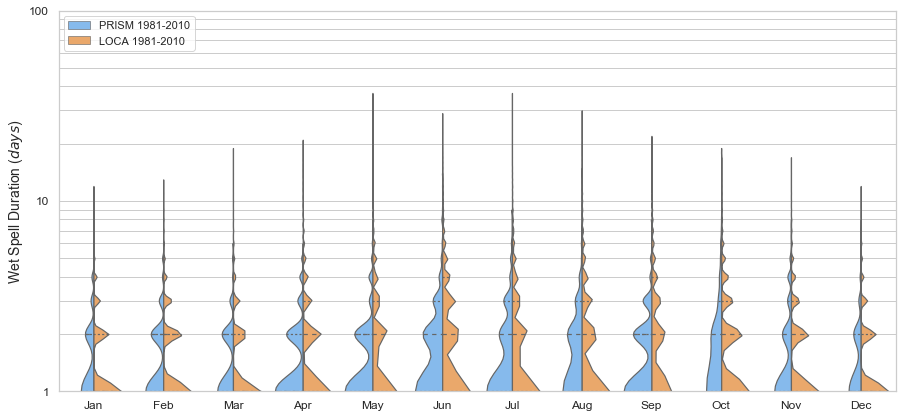

In [56]:
Fig1 = plt.figure()
Fig1.set_size_inches(15.0, 7.0)
ax11 = Fig1.add_subplot(111)
g = sns.violinplot( x="Month", y="MonTotal", hue="DLabel", split=True,
                inner="quart", cut=0, linewidth=1.2,
                palette={ PrismLabel : "xkcd:sky blue", 
                          LocaLabel : "xkcd:pale orange" },
                data=DPDF, ax=ax11, legend_out=True )
g.legend(prop=dict(size=12))
g.legend(loc="upper left")
g.set_yscale('log')
g.grid(b=True, which="both", axis='y')
g.set_yticks( preTicks )
g.set_xlabel('', fontsize=14 )
g.set_ylabel('Wet Spell Duration ($days$)', fontsize=14)
g.set_ylim( ( 1.0, 100.0))
g.tick_params(axis='both', which='major', labelsize=12)
g.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

### Projection 1: 2011-2040

#### Make DataFrame for Split Violin

In [57]:
PrismLabel = "PRISM 1981-2010"
LocaLabel = "LOCA 2011-2040"

In [58]:
MonthLabels = list()
DSetLabels = list()

In [59]:
for jJ in range( 1, 13, 1):
    PriAr = PrismMonDict[jJ]
    NumPRISM = PriAr.shape[0]
    LocaAr = L_P1_MD[jJ]
    NumLOCA = LocaAr.shape[0]
    PRISM_Labels = [ PrismLabel for x in range( NumPRISM ) ]
    LOCA_Labels = [ LocaLabel for x in range( NumLOCA ) ]
    AllLabels = deepcopy( PRISM_Labels )
    AllLabels.extend( LOCA_Labels )
    DSetLabels.extend( AllLabels )
    if jJ == 1:
        MonthLabels.extend( ["Jan" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 2:
        MonthLabels.extend( ["Feb" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 3:
        MonthLabels.extend( ["Mar" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 4:
        MonthLabels.extend( ["Apr" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 5:
        MonthLabels.extend( ["May" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 6:
        MonthLabels.extend( ["Jun" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 7:
        MonthLabels.extend( ["Jul" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 8:
        MonthLabels.extend( ["Aug" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 9:
        MonthLabels.extend( ["Sep" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 10:
        MonthLabels.extend( ["Oct" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 11:
        MonthLabels.extend( ["Nov" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 12:
        MonthLabels.extend( ["Dec" for x in range( NumPRISM + NumLOCA ) ] )
    # end if
    if jJ == 1:
        AllValues = np.concatenate( [ PriAr, LocaAr ], axis=0 )
    else:
        AllValues = np.concatenate( [ AllValues, PriAr, LocaAr ], axis=0 )
    # end if

In [60]:
DataDict = { "DLabel" : DSetLabels,
             "Month" : MonthLabels,
             "MonTotal" : AllValues, }
P1DF = pd.DataFrame( data=DataDict )

In [61]:
display( HTML( P1DF.head().to_html() ) )

,DLabel,Month,MonTotal
0,PRISM 1981-2010,Jan,1
1,PRISM 1981-2010,Jan,1
2,PRISM 1981-2010,Jan,1
3,PRISM 1981-2010,Jan,3
4,PRISM 1981-2010,Jan,2


In [62]:
display( HTML( P1DF.describe().to_html() ) )

,MonTotal
count,1.797232e+06
mean,2.385715e+00
std,1.982520e+00
min,1.000000e+00
25%,1.000000e+00
50%,2.000000e+00
75%,3.000000e+00
max,3.700000e+01


In [63]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "DF_MonWetSpell_2011-2040.pickle" ) )
P1DF.to_pickle( OutFiler, compression='zip', protocol=-1 )

#### Plot

In [64]:
#preTicks = [ 0.0 + (x *25.0) for x in range(9) ]
preTicks = [ 1.0, 10.0, 100.0 ]

In [65]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "MonWetSpell_Comp_2011-2040.svg") )
OutSVG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\MonWetSpell_Comp_2011-2040.svg'

In [66]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "MonWetSpell_Comp_2011-2040.png") )
OutPNG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\MonWetSpell_Comp_2011-2040.png'

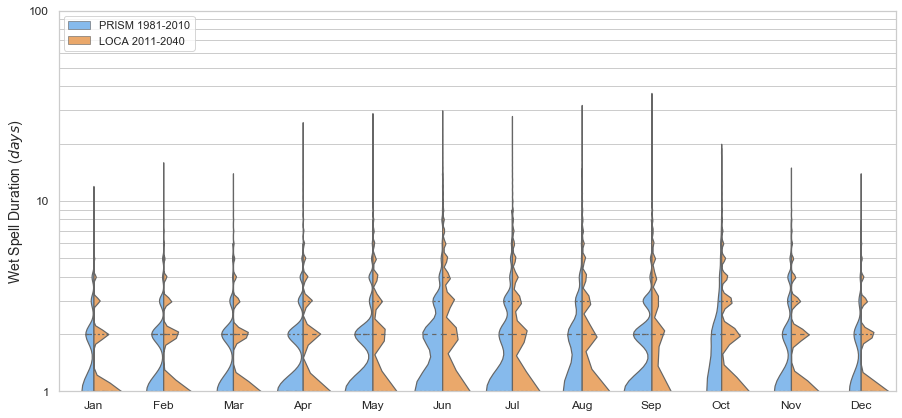

In [67]:
Fig1 = plt.figure()
Fig1.set_size_inches(15.0, 7.0)
ax11 = Fig1.add_subplot(111)
g = sns.violinplot( x="Month", y="MonTotal", hue="DLabel", split=True,
                inner="quart", cut=0, linewidth=1.2,
                palette={ PrismLabel : "xkcd:sky blue", 
                          LocaLabel : "xkcd:pale orange" },
                data=P1DF, ax=ax11, legend_out=True )
g.legend(prop=dict(size=12))
g.legend(loc="upper left")
g.set_yscale('log')
g.grid(b=True, which="both", axis='y')
g.set_yticks( preTicks )
g.set_xlabel('', fontsize=14 )
g.set_ylabel('Wet Spell Duration ($days$)', fontsize=14)
g.set_ylim( ( 1.0, 100.0))
g.tick_params(axis='both', which='major', labelsize=12)
g.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

### Projection 2: 2011-2040

#### Make DataFrame for Split Violin

In [68]:
PrismLabel = "PRISM 1981-2010"
LocaLabel = "LOCA 2041-2070"

In [69]:
MonthLabels = list()
DSetLabels = list()

In [70]:
for jJ in range( 1, 13, 1):
    PriAr = PrismMonDict[jJ]
    NumPRISM = PriAr.shape[0]
    LocaAr = L_P2_MD[jJ]
    NumLOCA = LocaAr.shape[0]
    PRISM_Labels = [ PrismLabel for x in range( NumPRISM ) ]
    LOCA_Labels = [ LocaLabel for x in range( NumLOCA ) ]
    AllLabels = deepcopy( PRISM_Labels )
    AllLabels.extend( LOCA_Labels )
    DSetLabels.extend( AllLabels )
    if jJ == 1:
        MonthLabels.extend( ["Jan" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 2:
        MonthLabels.extend( ["Feb" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 3:
        MonthLabels.extend( ["Mar" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 4:
        MonthLabels.extend( ["Apr" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 5:
        MonthLabels.extend( ["May" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 6:
        MonthLabels.extend( ["Jun" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 7:
        MonthLabels.extend( ["Jul" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 8:
        MonthLabels.extend( ["Aug" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 9:
        MonthLabels.extend( ["Sep" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 10:
        MonthLabels.extend( ["Oct" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 11:
        MonthLabels.extend( ["Nov" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 12:
        MonthLabels.extend( ["Dec" for x in range( NumPRISM + NumLOCA ) ] )
    # end if
    if jJ == 1:
        AllValues = np.concatenate( [ PriAr, LocaAr ], axis=0 )
    else:
        AllValues = np.concatenate( [ AllValues, PriAr, LocaAr ], axis=0 )
    # end if

In [71]:
DataDict = { "DLabel" : DSetLabels,
             "Month" : MonthLabels,
             "MonTotal" : AllValues, }
P2DF = pd.DataFrame( data=DataDict )

In [72]:
display( HTML( P2DF.head().to_html() ) )

,DLabel,Month,MonTotal
0,PRISM 1981-2010,Jan,1
1,PRISM 1981-2010,Jan,1
2,PRISM 1981-2010,Jan,1
3,PRISM 1981-2010,Jan,3
4,PRISM 1981-2010,Jan,2


In [73]:
display( HTML( P2DF.describe().to_html() ) )

,MonTotal
count,1.755481e+06
mean,2.381158e+00
std,1.986106e+00
min,1.000000e+00
25%,1.000000e+00
50%,2.000000e+00
75%,3.000000e+00
max,4.700000e+01


In [74]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "DF_MonWetSpell_2041-2070.pickle" ) )
P2DF.to_pickle( OutFiler, compression='zip', protocol=-1 )

#### Plot

In [75]:
#preTicks = [ 0.0 + (x *25.0) for x in range(9) ]
preTicks = [ 1.0, 10.0, 100.0 ]

In [76]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "MonWetSpell_Comp_2041-2070.svg") )
OutSVG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\MonWetSpell_Comp_2041-2070.svg'

In [77]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "MonWetSpell_Comp_2041-2070.png") )
OutPNG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\MonWetSpell_Comp_2041-2070.png'

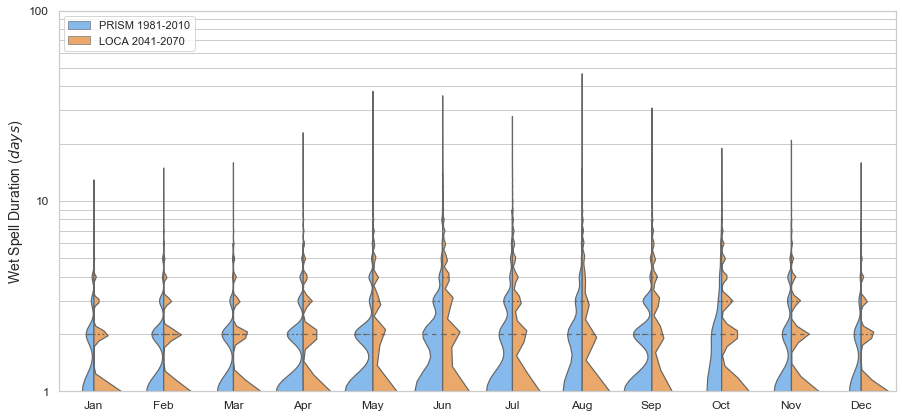

In [78]:
Fig1 = plt.figure()
Fig1.set_size_inches(15.0, 7.0)
ax11 = Fig1.add_subplot(111)
g = sns.violinplot( x="Month", y="MonTotal", hue="DLabel", split=True,
                inner="quart", cut=0, linewidth=1.2,
                palette={ PrismLabel : "xkcd:sky blue", 
                          LocaLabel : "xkcd:pale orange" },
                data=P2DF, ax=ax11, legend_out=True )
g.legend(prop=dict(size=12))
g.legend(loc="upper left")
g.set_yscale('log')
g.grid(b=True, which="both", axis='y')
g.set_yticks( preTicks )
g.set_xlabel('', fontsize=14 )
g.set_ylabel('Wet Spell Duration ($days$)', fontsize=14)
g.set_ylim( ( 1.0, 100.0))
g.tick_params(axis='both', which='major', labelsize=12)
g.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

### Projection 3: 2071-2100

#### Make DataFrame for Split Violin

In [79]:
PrismLabel = "PRISM 1981-2010"
LocaLabel = "LOCA 2071-2099"

In [80]:
MonthLabels = list()
DSetLabels = list()

In [81]:
for jJ in range( 1, 13, 1):
    PriAr = PrismMonDict[jJ]
    NumPRISM = PriAr.shape[0]
    LocaAr = L_P3_MD[jJ]
    NumLOCA = LocaAr.shape[0]
    PRISM_Labels = [ PrismLabel for x in range( NumPRISM ) ]
    LOCA_Labels = [ LocaLabel for x in range( NumLOCA ) ]
    AllLabels = deepcopy( PRISM_Labels )
    AllLabels.extend( LOCA_Labels )
    DSetLabels.extend( AllLabels )
    if jJ == 1:
        MonthLabels.extend( ["Jan" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 2:
        MonthLabels.extend( ["Feb" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 3:
        MonthLabels.extend( ["Mar" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 4:
        MonthLabels.extend( ["Apr" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 5:
        MonthLabels.extend( ["May" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 6:
        MonthLabels.extend( ["Jun" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 7:
        MonthLabels.extend( ["Jul" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 8:
        MonthLabels.extend( ["Aug" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 9:
        MonthLabels.extend( ["Sep" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 10:
        MonthLabels.extend( ["Oct" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 11:
        MonthLabels.extend( ["Nov" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 12:
        MonthLabels.extend( ["Dec" for x in range( NumPRISM + NumLOCA ) ] )
    # end if
    if jJ == 1:
        AllValues = np.concatenate( [ PriAr, LocaAr ], axis=0 )
    else:
        AllValues = np.concatenate( [ AllValues, PriAr, LocaAr ], axis=0 )
    # end if

In [82]:
DataDict = { "DLabel" : DSetLabels,
             "Month" : MonthLabels,
             "MonTotal" : AllValues, }
P3DF = pd.DataFrame( data=DataDict )

In [83]:
display( HTML( P3DF.head().to_html() ) )

,DLabel,Month,MonTotal
0,PRISM 1981-2010,Jan,1
1,PRISM 1981-2010,Jan,1
2,PRISM 1981-2010,Jan,1
3,PRISM 1981-2010,Jan,3
4,PRISM 1981-2010,Jan,2


In [84]:
display( HTML( P3DF.describe().to_html() ) )

,MonTotal
count,1.657256e+06
mean,2.369456e+00
std,2.014617e+00
min,1.000000e+00
25%,1.000000e+00
50%,2.000000e+00
75%,3.000000e+00
max,3.900000e+01


In [85]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "DF_MonWetSpell_2071-2100.pickle" ) )
P3DF.to_pickle( OutFiler, compression='zip', protocol=-1 )

#### Plot

In [86]:
#preTicks = [ 0.0 + (x *25.0) for x in range(9) ]
preTicks = [ 1.0, 10.0, 100.0 ]

In [87]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "MonWetSpell_Comp_2071-2100.svg") )
OutSVG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\MonWetSpell_Comp_2071-2100.svg'

In [88]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "MonWetSpell_Comp_2071-2100.png") )
OutPNG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\MonWetSpell_Comp_2071-2100.png'

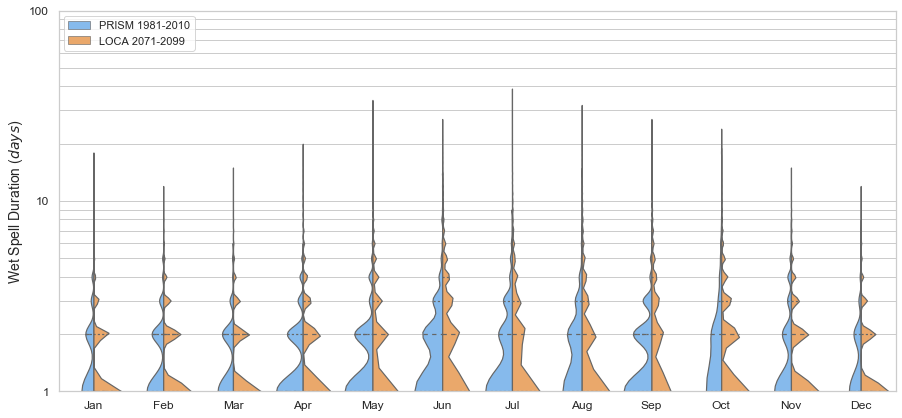

In [89]:
Fig1 = plt.figure()
Fig1.set_size_inches(15.0, 7.0)
ax11 = Fig1.add_subplot(111)
g = sns.violinplot( x="Month", y="MonTotal", hue="DLabel", split=True,
                inner="quart", cut=0, linewidth=1.2,
                palette={ PrismLabel : "xkcd:sky blue", 
                          LocaLabel : "xkcd:pale orange" },
                data=P3DF, ax=ax11, legend_out=True )
g.legend(prop=dict(size=12))
g.legend(loc="upper left")
g.set_yscale('log')
g.grid(b=True, which="both", axis='y')
g.set_yticks( preTicks )
g.set_xlabel('', fontsize=14 )
g.set_ylabel('Wet Spell Duration ($days$)', fontsize=14)
g.set_ylim( ( 1.0, 100.0))
g.tick_params(axis='both', which='major', labelsize=12)
g.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

## Final Plots

In [8]:
InFiler = os.path.normpath( os.path.join( OUT_DIR, "DF_MonWetSpell_1981-2010.pickle" ) )
DPDF = pd.read_pickle( InFiler, compression='zip' )

In [9]:
InFiler = os.path.normpath( os.path.join( OUT_DIR, "DF_MonWetSpell_2011-2040.pickle" ) )
P1DF = pd.read_pickle( InFiler, compression='zip' )

In [10]:
InFiler = os.path.normpath( os.path.join( OUT_DIR, "DF_MonWetSpell_2041-2070.pickle" ) )
P2DF = pd.read_pickle( InFiler, compression='zip' )

In [11]:
InFiler = os.path.normpath( os.path.join( OUT_DIR, "DF_MonWetSpell_2071-2100.pickle" ) )
P3DF = pd.read_pickle( InFiler, compression='zip' )

In [12]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Mon_WetSpell_All_BXN.svg") )
OutSVG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Mon_WetSpell_All_BXN.svg'

In [13]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Mon_WetSpell_All_BXN.png") )
OutPNG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Mon_WetSpell_All_BXN.png'

In [14]:
PrismLabel1 = "PRISM 1981-2010"
LocaLabel1 = "LOCA 1981-2010"
PrismLabel2 = "PRISM 1981-2010"
LocaLabel2 = "LOCA 2011-2040"
PrismLabel3 = "PRISM 1981-2010"
LocaLabel3 = "LOCA 2041-2070"
PrismLabel4 = "PRISM 1981-2010"
LocaLabel4 = "LOCA 2071-2099"

In [15]:
preTicks = [ 1.0, 10.0, 100.0 ]

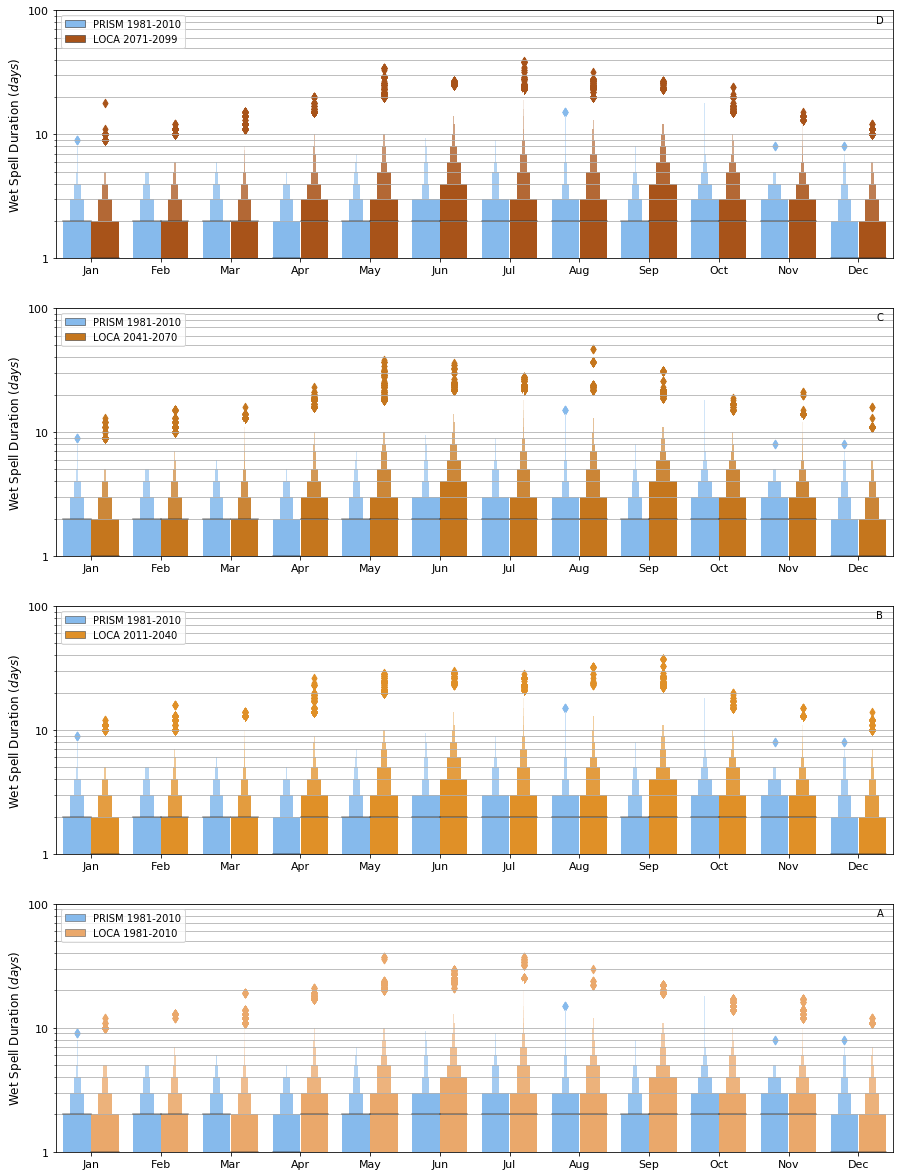

In [16]:
Fig1 = plt.figure()
Fig1.set_size_inches(15, 21)
ax11 = Fig1.add_subplot(4,1,1)
g1 = sns.boxenplot( x="Month", y="MonTotal", hue="DLabel",
                   dodge=True, linewidth=1.2, orient="v",
                   palette={ PrismLabel4 : "xkcd:sky blue", 
                             LocaLabel4 : "xkcd:burnt orange" },
                   data=P3DF, ax=ax11 )
g1.legend(prop=dict(size=11))
g1.legend(loc="upper left")
g1.set_yscale('log')
g1.grid(b=True, which="both", axis='y')
g1.set_yticks( preTicks )
g1.set_xlabel('', fontsize=12 )
g1.set_ylabel('Wet Spell Duration ($days$)', fontsize=12)
g1.set_ylim( ( 1.0, 100.0))
g1.tick_params(axis='both', which='major', labelsize=11)
g1.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
g1.annotate("D", xy=(0.98,0.95), xycoords="axes fraction")
ax21 = Fig1.add_subplot(4,1,2)
g2 = sns.boxenplot( x="Month", y="MonTotal", hue="DLabel",
                   dodge=True, linewidth=1.2, orient="v",
                   palette={ PrismLabel3 : "xkcd:sky blue", 
                             LocaLabel3 : "xkcd:pumpkin" },
                   data=P2DF, ax=ax21 )
g2.legend(prop=dict(size=11))
g2.legend(loc="upper left")
g2.set_yscale('log')
g2.grid(b=True, which="both", axis='y')
g2.set_yticks( preTicks )
g2.set_xlabel('', fontsize=12 )
g2.set_ylabel('Wet Spell Duration ($days$)', fontsize=12)
g2.set_ylim( ( 1.0, 100.0))
g2.tick_params(axis='both', which='major', labelsize=11)
g2.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
g2.annotate("C", xy=(0.98,0.95), xycoords="axes fraction")
ax31 = Fig1.add_subplot(4,1,3)
g3 = sns.boxenplot( x="Month", y="MonTotal", hue="DLabel",
                   dodge=True, linewidth=1.2, orient="v",
                   palette={ PrismLabel2 : "xkcd:sky blue", 
                             LocaLabel2 : "xkcd:tangerine" },
                   data=P1DF, ax=ax31 )
g3.legend(prop=dict(size=11))
g3.legend(loc="upper left")
g3.set_yscale('log')
g3.grid(b=True, which="both", axis='y')
g3.set_yticks( preTicks )
g3.set_xlabel('', fontsize=12 )
g3.set_ylabel('Wet Spell Duration ($days$)', fontsize=12)
g3.set_ylim( ( 1.0, 100.0))
g3.tick_params(axis='both', which='major', labelsize=11)
g3.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
g3.annotate("B", xy=(0.98,0.95), xycoords="axes fraction")
ax41 = Fig1.add_subplot(4,1,4)
g4 = sns.boxenplot( x="Month", y="MonTotal", hue="DLabel",
                   dodge=True, linewidth=1.2, orient="v",
                   palette={ PrismLabel1 : "xkcd:sky blue", 
                             LocaLabel1 : "xkcd:pale orange" },
                   data=DPDF, ax=ax41 )
g4.legend(prop=dict(size=11))
g4.legend(loc="upper left")
g4.set_yscale('log')
g4.grid(b=True, which="both", axis='y')
g4.set_yticks( preTicks )
g4.set_xlabel('', fontsize=12 )
g4.set_ylabel('Wet Spell Duration ($days$)', fontsize=12)
g4.set_ylim( ( 1.0, 100.0))
g4.tick_params(axis='both', which='major', labelsize=11)
g4.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
g4.annotate("A", xy=(0.98,0.95), xycoords="axes fraction")
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

In [17]:
nP1DF = P1DF[P1DF["DLabel"] == 'LOCA 2011-2040'].copy()
nP1DF["DLabel"].unique()

array(['LOCA 2011-2040'], dtype=object)

In [18]:
nP2DF = P2DF[P2DF["DLabel"] == 'LOCA 2041-2070'].copy()
nP3DF = P3DF[P3DF["DLabel"] == 'LOCA 2071-2099'].copy()
len( nP2DF ), len( nP3DF )

(1708152, 1609927)

In [19]:
All1 = pd.concat( [ DPDF, nP1DF, nP2DF, nP3DF ], ignore_index=True )

In [20]:
All1["DLabel"].unique()

array(['PRISM 1981-2010', 'LOCA 1981-2010', 'LOCA 2011-2040',
       'LOCA 2041-2070', 'LOCA 2071-2099'], dtype=object)

In [21]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Mon_WetSpell_All1ax_BXN.svg") )
OutSVG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Mon_WetSpell_All1ax_BXN.svg'

In [22]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Mon_WetSpell_All1ax_BXN.png") )
OutPNG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Mon_WetSpell_All1ax_BXN.png'

In [23]:
OutPDF = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Mon_WetSpell_All1ax_BXN.pdf") )
OutPDF

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Mon_WetSpell_All1ax_BXN.pdf'

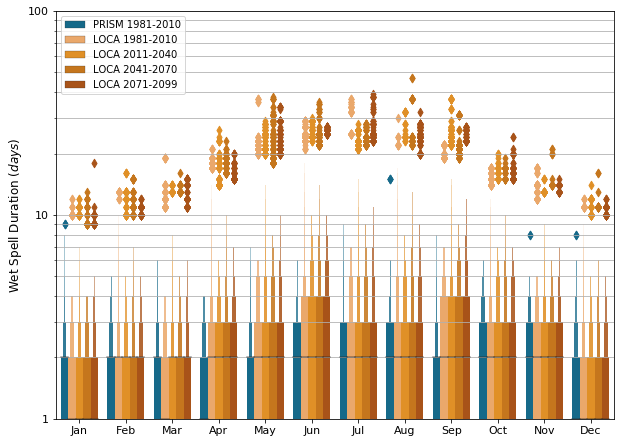

In [26]:
Fig1 = plt.figure()
Fig1.set_size_inches(10, 7.5)
ax11 = Fig1.add_subplot()
g1 = sns.boxenplot( x="Month", y="MonTotal", hue="DLabel",
                   dodge=True, linewidth=0.5, orient="v",
                   palette={ PrismLabel1 : "xkcd:ocean blue",
                             LocaLabel1 : "xkcd:pale orange",
                             LocaLabel2 : "xkcd:tangerine",
                             LocaLabel3 : "xkcd:pumpkin",
                             LocaLabel4 : "xkcd:burnt orange" },
                   data=All1, ax=ax11 )
g1.legend(prop=dict(size=11))
g1.legend(loc="upper left")
g1.set_yscale('log')
g1.grid(b=True, which="both", axis='y')
g1.set_yticks( preTicks )
g1.set_xlabel('', fontsize=12 )
g1.set_ylabel('Wet Spell Duration ($days$)', fontsize=12)
g1.set_ylim( ( 1.0, 100.0))
g1.tick_params(axis='both', which='major', labelsize=11)
g1.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )
Fig1.savefig( OutPDF )